Solve with multiple adapters and compare the results
======================================================

Since the OMMX Adapter provides a unified API, you can solve the same problem using multiple solvers and compare the results. Let's consider a simple knapsack problem as an example:

$$
\begin{align*}
\mathrm{maximize} \quad & \sum_{i=0}^{N-1} v_i x_i \\
\mathrm{s.t.} \quad & \sum_{i=0}^{n-1} w_i x_i - W \leq 0, \\
& x_{i} \in \{ 0, 1\} 
\end{align*}
$$

In [1]:
from ommx.v1 import Instance, DecisionVariable

v = [10, 13, 18, 31, 7, 15]
w = [11, 25, 20, 35, 10, 33]
W = 47
N = len(v)

x = [
    DecisionVariable.binary(
        id=i,
        name="x",
        subscripts=[i],
    )
    for i in range(N)
]
instance = Instance.from_components(
    decision_variables=x,
    objective=sum(v[i] * x[i] for i in range(N)),
    constraints=[sum(w[i] * x[i] for i in range(N)) - W <= 0],
    sense=Instance.MAXIMIZE,
)

## Solve with multiple adapters

Here, we will use OSS adapters developed as a part of OMMX Python SDK.
For non-OSS solvers, adapters are also available and can be used with the same interface.
A complete list of supported adapters for each solver can be found in [Supported Adapters](../user_guide/supported_ommx_adapters.ipynb).

Here, let's solve the knapsack problem with OSS solvers, Highs, SCIP.

In [2]:
from ommx_highs_adapter import OMMXHighsAdapter
from ommx_pyscipopt_adapter import OMMXPySCIPOptAdapter


# List of adapters to use
adapters = {
    "highs": OMMXHighsAdapter,
    "scip": OMMXPySCIPOptAdapter,
}

# Solve the problem using each adapter
solutions = {
    name: adapter.solve(instance) for name, adapter in adapters.items()
}

## Compare the results

Since this knapsack problem is simple, all solvers will find the optimal solution.

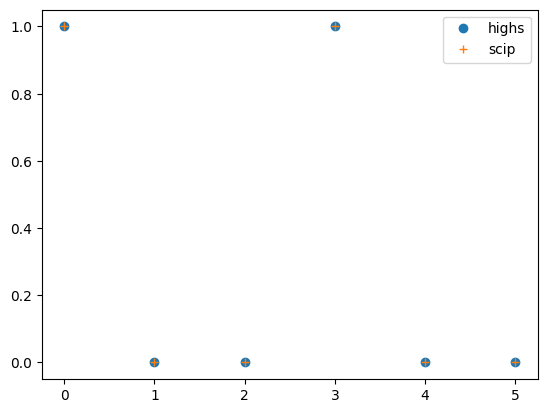

In [3]:
from matplotlib import pyplot as plt

marks = {
    "highs": "o",
    "scip": "+",
}

for name, solution in solutions.items():
    x = solution.extract_decision_variables("x")
    subscripts = [key[0] for key in x.keys()]
    plt.plot(subscripts, x.values(), marks[name], label=name)

plt.legend()

It would be convenient to concatenate the `pandas.DataFrame` obtained with `decision_variables_df` when analyzing the results of multiple solvers.

In [4]:
import pandas

decision_variables = pandas.concat([
    solution.decision_variables_df.assign(solver=solver)
    for solver, solution in solutions.items()
])
decision_variables

,kind,lower,upper,name,subscripts,description,substituted_value,value,solver
id,,,,,,,,,
0,Binary,-0.0,1.0,x,[0],<NA>,<NA>,1.0,highs
1,Binary,-0.0,1.0,x,[1],<NA>,<NA>,0.0,highs
2,Binary,-0.0,1.0,x,[2],<NA>,<NA>,0.0,highs
3,Binary,-0.0,1.0,x,[3],<NA>,<NA>,1.0,highs
4,Binary,-0.0,1.0,x,[4],<NA>,<NA>,0.0,highs
5,Binary,-0.0,1.0,x,[5],<NA>,<NA>,0.0,highs
0,Binary,-0.0,1.0,x,[0],<NA>,<NA>,1.0,scip
1,Binary,-0.0,1.0,x,[1],<NA>,<NA>,0.0,scip
2,Binary,-0.0,1.0,x,[2],<NA>,<NA>,0.0,scip
